In [10]:
"""
Monte Carlo Learning Implementation
====================================

This script implements a Monte Carlo learning algorithm for a simple random walk problem. The state space is represented as a dictionary with state names and their corresponding value estimates.

Functions:
----------
1. `random_walk(state)`: Simulates the state transition rules for the random walk.
2. `monte_carlo_learning(alpha, gamma, threshold, max_episodes)`: Implements the Monte Carlo learning algorithm.
3. `plot_value_history(value_history)`: Plots the value function updates over episodes for visualization.

Usage:
------
Run the script as a standalone program to compute value function estimates for the random walk problem.

Example:
--------
    python MonteCarloLearning.py
"""
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
# Define the state space as a dictionary, storing state names and their value estimates
states = {
    'terminal_left': 0.0,
    'A': 0.0,
    'B': 0.0,
    'C': 0.0,
    'D': 0.0,
    'E': 0.0,
    'terminal_right': 1.0
}

In [12]:
def random_walk(state) -> str:
    """
    Simulates the state transition rules for the random walk, including terminal states.

    Parameters
    ----------
    state : str
        Current state of the agent.

    Returns
    -------
    str
        Next state of the agent, chosen randomly between the adjacent states.

    Example
    -------
    >>> next_state = random_walk('C')
    """
    state_keys = list(states.keys())  # Extract state names
    index = state_keys.index(state)
    return np.random.choice([state_keys[index - 1], state_keys[index + 1]])  # 50% probability to move left or right

In [13]:
def monte_carlo_learning(alpha=0.1, gamma=0.9, threshold=1e-6, max_episodes=10000) -> tuple[dict, dict]:
    """
    Monte Carlo learning algorithm using backward recursion.

    Parameters
    ----------
    alpha : float, optional
        Learning rate, default is 0.1.
    gamma : float, optional
        Discount factor, default is 0.9.
    threshold : float, optional
        Threshold for value function changes; iteration stops when below this value, default is 1e-6.
    max_episodes : int, optional
        Maximum number of iterations to prevent infinite loops, default is 10000.

    Returns
    -------
    tuple[dict, dict]
        A tuple containing:
        - estimated_values (dict): Value function estimates for each state.
        - value_history (dict): Value history for all states over episodes.

    Example
    -------
    >>> estimated_values = monte_carlo_learning(alpha=0.01, gamma=0.9, threshold=1e-6, max_episodes=10000)
    """
    value_history = {state: [] for state in states}  # Store value updates for plotting
    for state in states:
        value_history[state].append(states[state])

    for episode in range(max_episodes):
        max_delta = 0  # Tracks the maximum change in value functions

        # Generate a complete episode
        state = 'C'  # Starting state
        episode_data = []  # Store the (state, reward) sequence

        while state not in ['terminal_left', 'terminal_right']:
            next_state = random_walk(state)
            reward = 1 if next_state == 'terminal_right' else 0
            episode_data.append((state, reward))
            state = next_state

        # Compute the returns and update the value function
        G = 0
        for state, reward in reversed(episode_data):  # Calculate returns backward from the end of the episode
            G = reward + gamma * G
            old_value = states[state]  # Save the value function before the update
            states[state] += alpha * (G - states[state])  # Incrementally update the value function
            max_delta = max(max_delta, abs(states[state] - old_value))  # Update the maximum change in value

        # Record current value function for all states
        for state in states:
            value_history[state].append(states[state])

        # Check if the termination condition is met
        if episode > 100 and max_delta < threshold:
            print(f'Value function converged, stopping at iteration {episode + 1} (Max change: {max_delta})')
            break
    print(f'Reached maximum iterations {max_episodes}, stopping execution')

    return states, value_history

In [14]:
def plot_value_history(value_history) -> None:
    """
    Plot the value function updates over episodes for each state.

    Parameters
    ----------
    value_history : dict
        A dictionary where keys are state names and values are lists of their value estimates over episodes.

    Returns
    -------
    None

    Example
    -------
    >>> plot_value_history(value_history)
    """
    plt.figure(figsize=(15, 6))
    for state, values in value_history.items():
        plt.plot(values, label=f'V({state})')
    plt.xlabel('Episodes')
    plt.ylabel('Value')
    plt.title('Value Function Updates Over Episodes')
    plt.legend()
    plt.grid()
    plt.show()

In [68]:
alpha = 0.01  # Learning rate
gamma = 0.9  # Discount factor
threshold = 1e-6  # Termination condition
max_episodes = 10000  # Maximum number of iterations

estimated_values, value_history = monte_carlo_learning(alpha, gamma, threshold, max_episodes)

# Output the estimated value functions
print('Estimated Value Functions:')
for state, value in estimated_values.items():
    print(f'V({state}) = {value}')

Reached maximum iterations 10000, stopping execution
Estimated Value Functions:
V(terminal_left) = 0.0
V(A) = 0.05166971789916323
V(B) = 0.12092060716962082
V(C) = 0.24808672486670655
V(D) = 0.44927775397217945
V(E) = 0.7193396714913982
V(terminal_right) = 1.0


In [69]:
# Remove terminal states for visualization
del value_history['terminal_left']
del value_history['terminal_right']

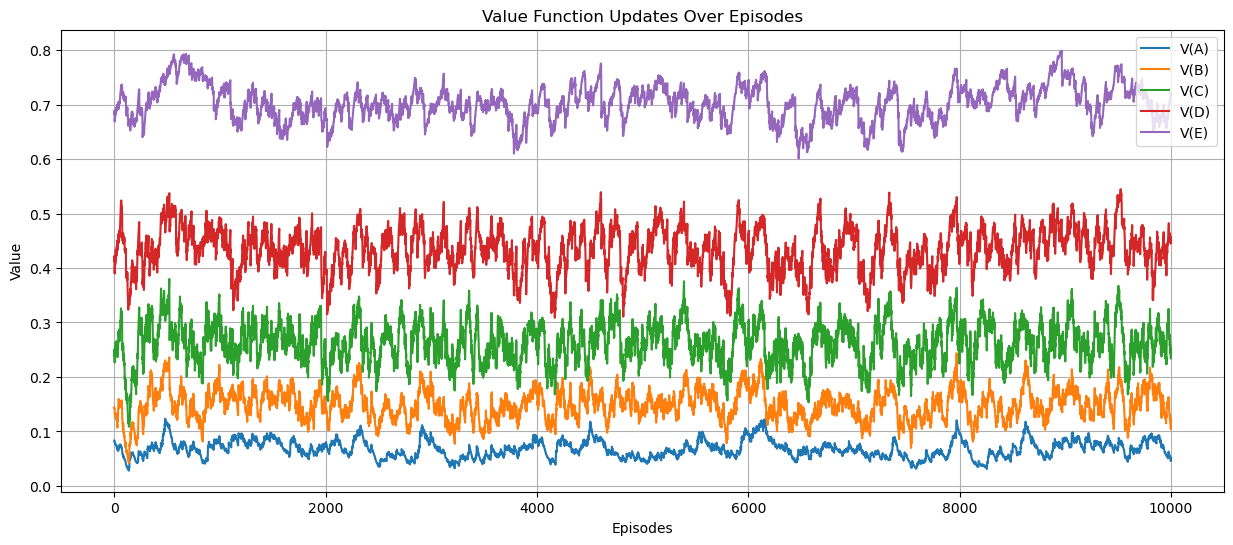

In [70]:
# Plot the value function history
plot_value_history(value_history)